This dataset contains measurements for four physical attributes of three different species of Iris Flowers, the purpose is to see how accurate are hierarchical clustering algorithms for the classification of this three species? Will the resulting clusters coincide with the taxonomical classification?

In [2]:
# Import Packages 
import numpy as np                # linear algebra
import pandas as pd               # data frames
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
import scipy.stats                # statistics
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage


# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


 # DESCRIPTIVE ANALISIS

Lets see what we have here...

In [4]:
iris = pd.read_csv("Iris.csv")

#Primeros registros
print(iris.head())
# No de observaciones y tipo de datos
print(iris.info())
# Numero de Observaciones y Columnas
print(iris.shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
(150, 6)


We have 150 entries, and for each entry we have information of the following physycal properties: Sepal Length, Sepal Width, Petal Length and Petal Width all of them measured in centimeters, and the Taxonomical classification of the species.

C:\Users\vaish\AppData\Local\Temp\ipykernel_2404\666003673.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(matcorr, dtype=np.bool)


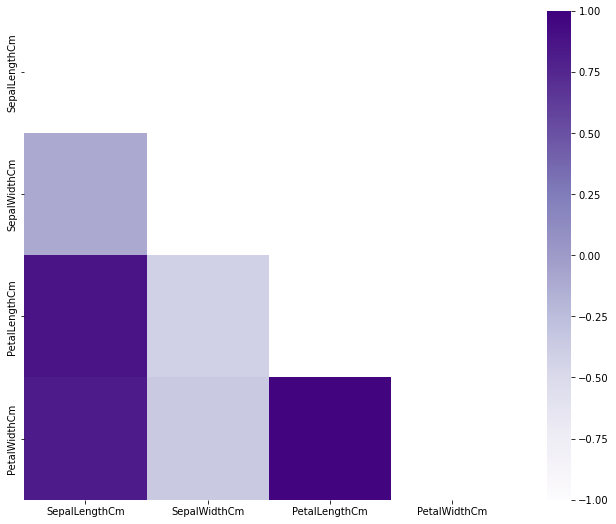

In [5]:
#Matriz de correlacion
matcorr = iris.iloc[:,~iris.columns.isin(['Id','Species'])].corr()
mask = np.zeros_like(matcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matcorr, mask=mask, cmap="Purples", vmin=-1, vmax=1, center=0, square=True);
plt.show()

There seems to be a positive correlation between the Petal attributes (Width and Length) and the Sepal Length. Also between the Petal dimensions, this is, longer petals tend to also be wider.

Since this is an unsupervised learning excersize, I'll be ignoring the classification given in the dataset for now

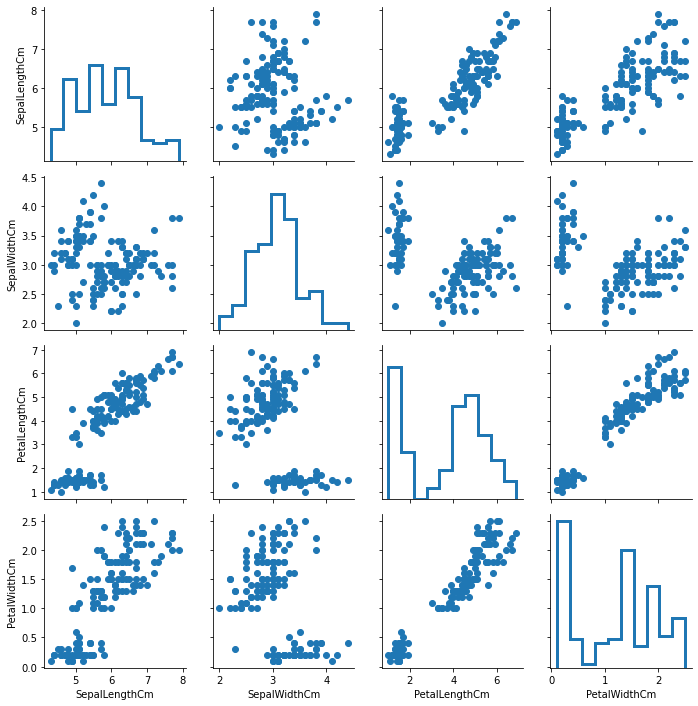

In [6]:
g = sns.PairGrid(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])
g.map_diag(plt.hist, histtype="step", linewidth=3)
g.map_offdiag(plt.scatter)

At first, if we ignore the information of the flower species given in the dataset, it seem that there are two easily distinguishable groups:

One with small petals and relatively short and thick Sepals
One with larger petals and somewhat longer and thinner Sepals
Since we already know that there are individuals from three species in the sample, a priori it seems that there is a species that will by easily separated in one cluster whereas classifying the other two won't be so easy

## HIERARCHICAL CLUSTERING - SINGLE METHOD

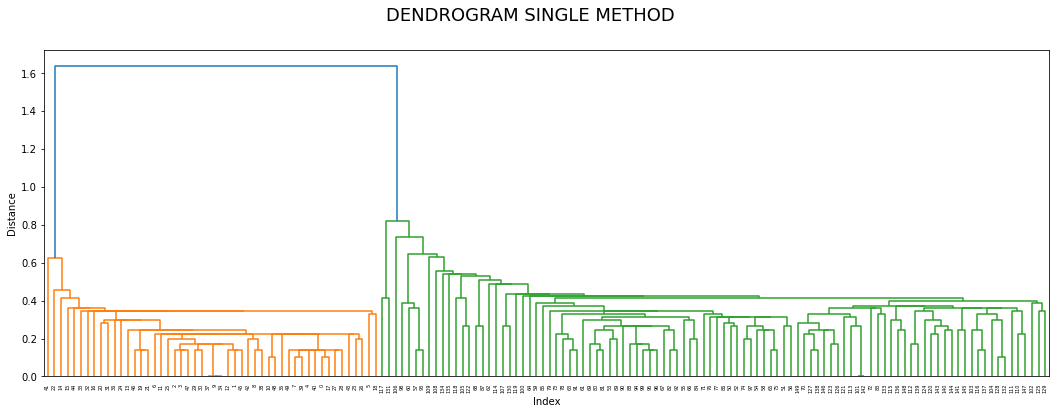

In [7]:
dist_sin = linkage(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

As expected, the resulting dendrogram using the 'single' suggest the existence of two clusters but it is not so clear the existence of a third one. If I didn't now that the dataser contains data from three species I would stop at two. But, I also would like to see how much the clusters differ from the taxonomical classification, so I also want to see what happens if a choose 3 clusters.

In [9]:
from scipy.cluster.hierarchy import fcluster
iris_SM=iris.copy()

iris_SM['2_clust']=fcluster(dist_sin,2, criterion='maxclust')
iris_SM['3_clust']=fcluster(dist_sin,3, criterion='maxclust')
iris_SM.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,2_clust,3_clust
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1


Now lets see how much the clusters differ from the actual species

<AxesSubplot:title={'center':'Species'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

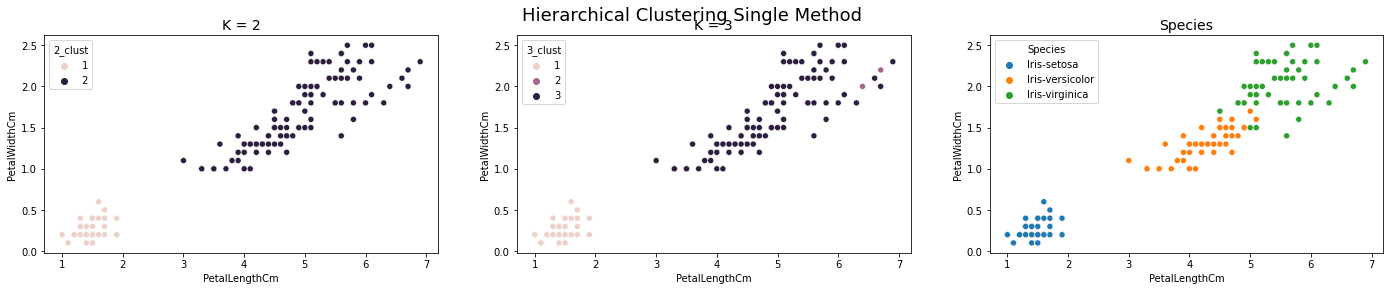

In [10]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_SM, hue="2_clust")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_SM, hue="3_clust")

plt.subplot(1,3,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_SM, hue="Species")

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'K = 3'}, xlabel='Species', ylabel='3_clust'>

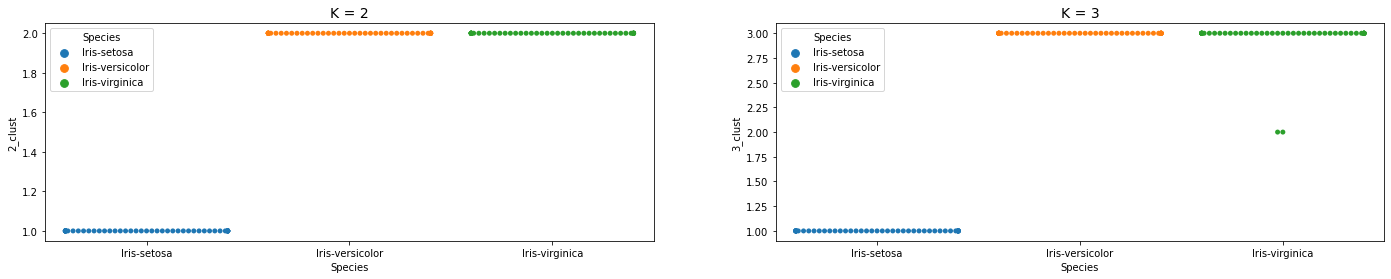

In [11]:
plt.figure(figsize=(24,4))
plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="Species",y="2_clust", data=iris_SM, hue="Species")

plt.subplot(1,2,2)
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="Species",y="3_clust", data=iris_SM, hue="Species")

It makes no diference going from 2 clusters to 3, the aditional cluster is not representative.

As expected, there is one Species clearly classified by this method, however the other two species are not appropiately separated when using Hierarchical Clustering with the 'Single' method

<AxesSubplot:ylabel='2_clust'>

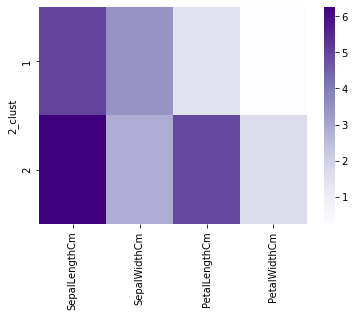

In [12]:
sns.heatmap(iris_SM.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","2_clust"]].groupby(['2_clust']).mean(), cmap="Purples")

Cluster 1: Small petals and thick Sepals

Cluster 2: Long Petals and Long Sepals

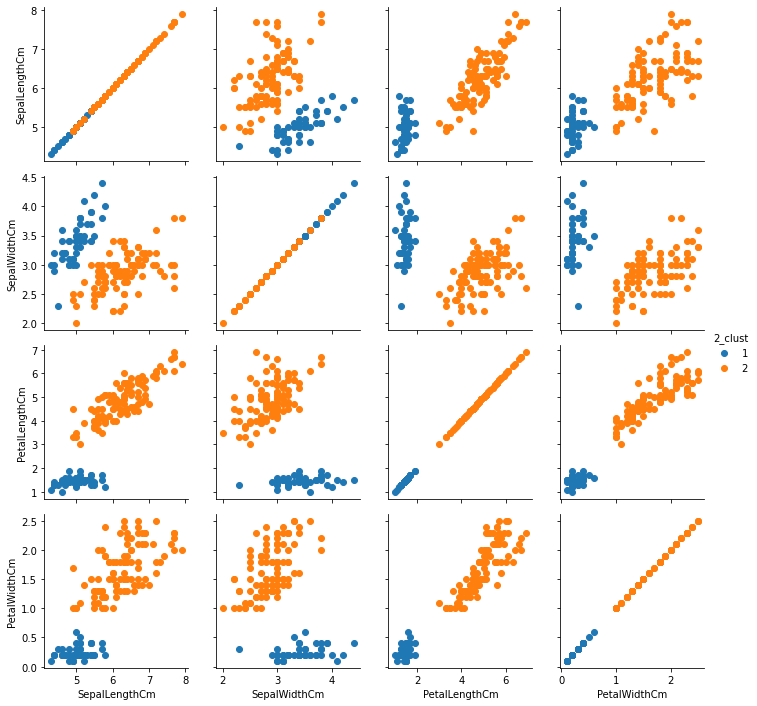

In [13]:
g = sns.PairGrid(iris_SM, vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], hue='2_clust')
g.map(plt.scatter)
g.add_legend()

## HIERARCHICAL CLUSTERING - COMPLETE METHOD

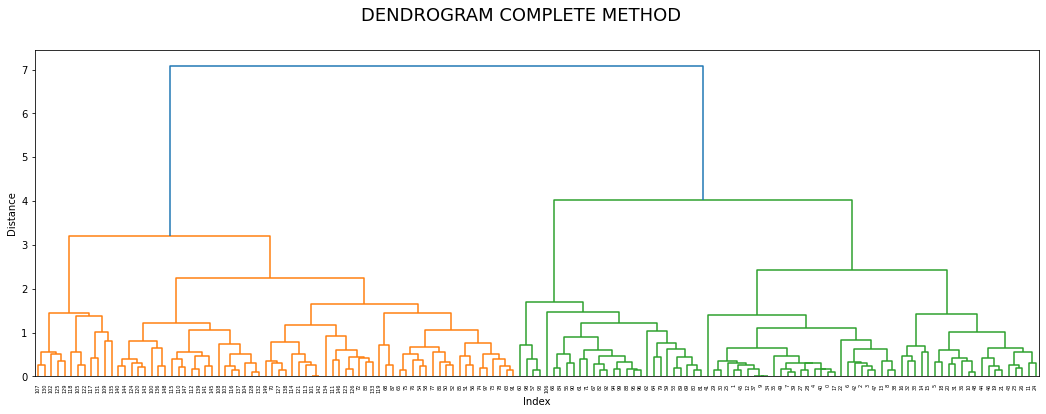

In [15]:
dist_comp = linkage(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="complete")

plt.figure(figsize=(18,6))
dendrogram(dist_comp, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18) 
plt.show()

Using the 'Complete' method for the hierarchical clustering seems to suggests a number of 2 or 3 clusters.

Lets see how well these clusters replicate the taxonomical species of the Iris Flowers

In [16]:
iris_CM=iris.copy()
iris_CM['2_clust']=fcluster(dist_comp,2, criterion='maxclust')
iris_CM['3_clust']=fcluster(dist_comp,3, criterion='maxclust')
iris_CM.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,2_clust,3_clust
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2,3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2,3
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2,3
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2,3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2,3


<AxesSubplot:title={'center':'Species'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

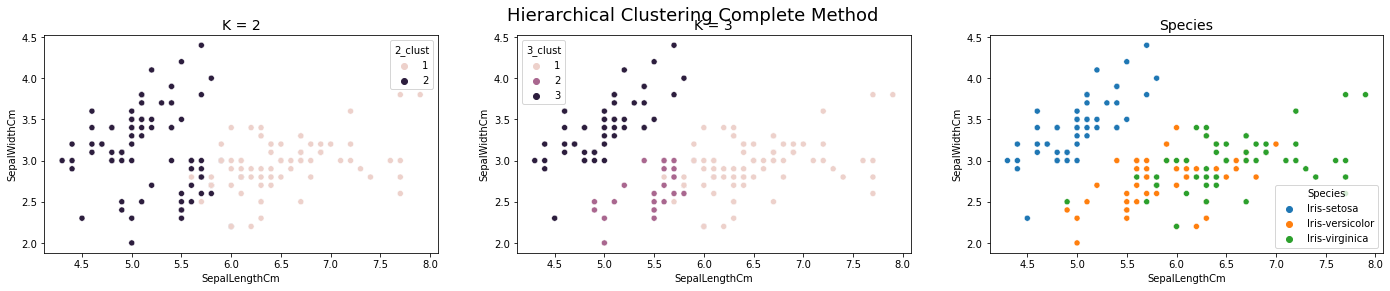

In [17]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Complete Method",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_CM, hue="2_clust")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_CM, hue="3_clust")

plt.subplot(1,3,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_CM, hue="Species")

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'K = 3'}, xlabel='Species', ylabel='3_clust'>

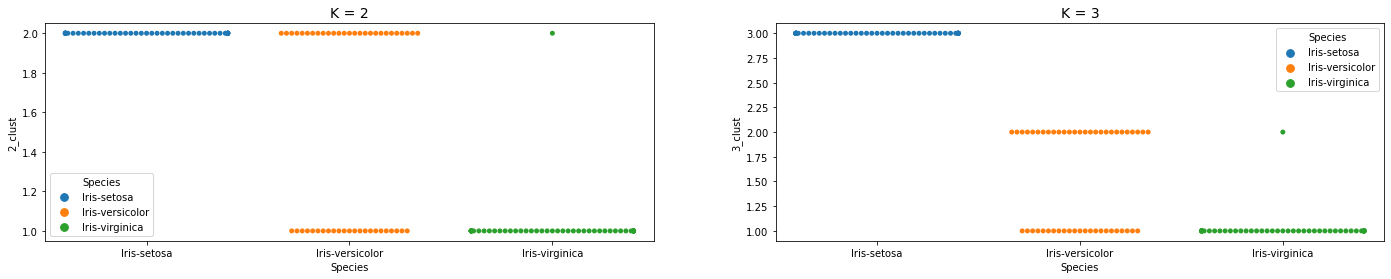

In [18]:
plt.figure(figsize=(24,4))
plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="Species",y="2_clust", data=iris_CM, hue="Species")

plt.subplot(1,2,2)
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="Species",y="3_clust", data=iris_CM, hue="Species")

In [19]:
print(pd.crosstab(iris_CM["Species"],iris_CM["3_clust"]))

3_clust           1   2   3
Species                    
Iris-setosa       0   0  50
Iris-versicolor  23  27   0
Iris-virginica   49   1   0


In this case, two clusters do not seem to work as a good separation between the three species.

Using three clusters separates all iris-setosa specimens in one cluster and all but one specimen of Iris-virginica in another one.

In this case, using "Complete" method for hierarchical clustering gives better results than "Single" method. However, Iris-versicolor data is still problematic for the algorithm.

<AxesSubplot:ylabel='3_clust'>

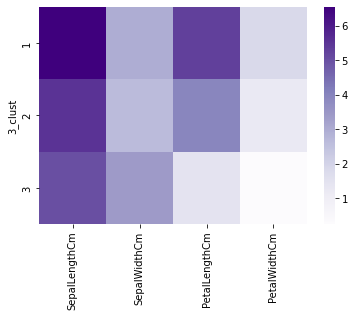

In [20]:
sns.heatmap(iris_CM.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","3_clust"]].groupby(['3_clust']).mean(), cmap="Purples")

The heatmap shows that the clusters separation shows decreasing values for Petal Width and Length, and Sepal Lenght. With flowers in cluster 3 being the smaller ones and flowers in cluster 1 the larger ones.

Cluster 1: Largest Flowers: This flowers have the largest petals and longer sepals of the dataset.
Cluster 2: Medium size flowers.
Cluster 3: Small Flower.

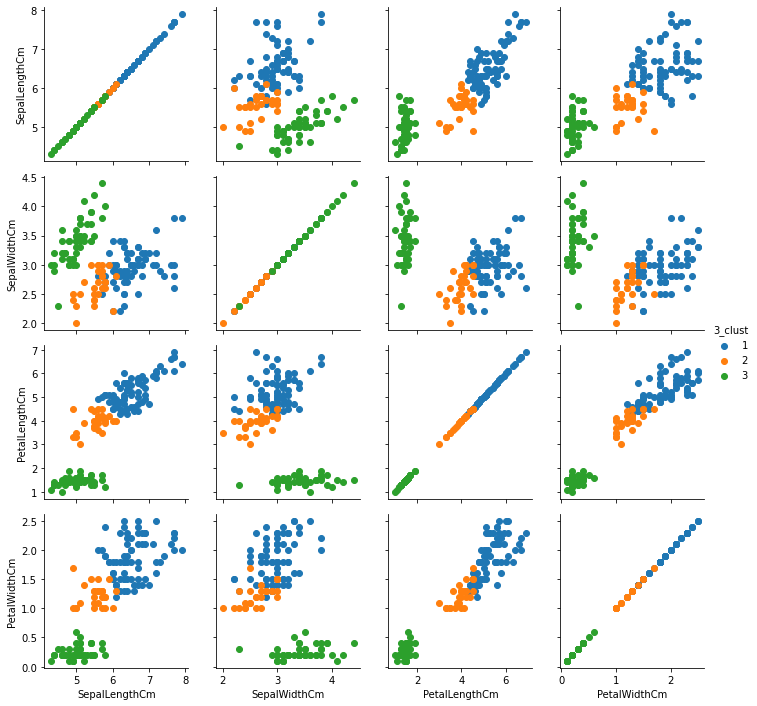

In [22]:
g = sns.PairGrid(iris_CM, vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], hue='3_clust')
g.map(plt.scatter)
g.add_legend()

## HIERARCHICAL CLUSTERING - WARD METHOD

Finally, I will try Hierarchical Clusterin using the Ward variance minimization algorithm.

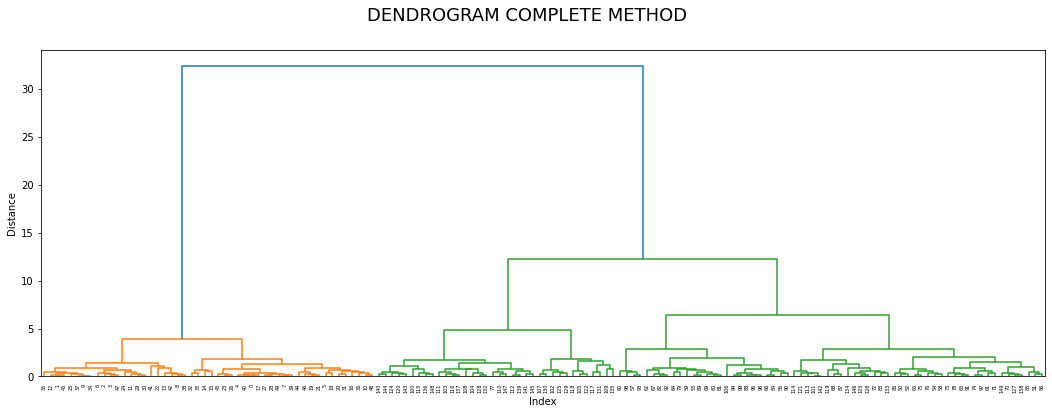

In [23]:
dist_comp = linkage(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="ward")

plt.figure(figsize=(18,6))
dendrogram(dist_comp, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18) 
plt.show()

This method seems to suggest more strongly the existence of three clusters, lets see how it goes

In [24]:
iris_WM=iris.copy()
iris_WM['2_clust']=fcluster(dist_comp,2, criterion='maxclust')
iris_WM['3_clust']=fcluster(dist_comp,3, criterion='maxclust')
iris_WM['4_clust']=fcluster(dist_comp,4, criterion='maxclust')
iris_WM.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,2_clust,3_clust,4_clust
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1,1


<AxesSubplot:title={'center':'Species'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

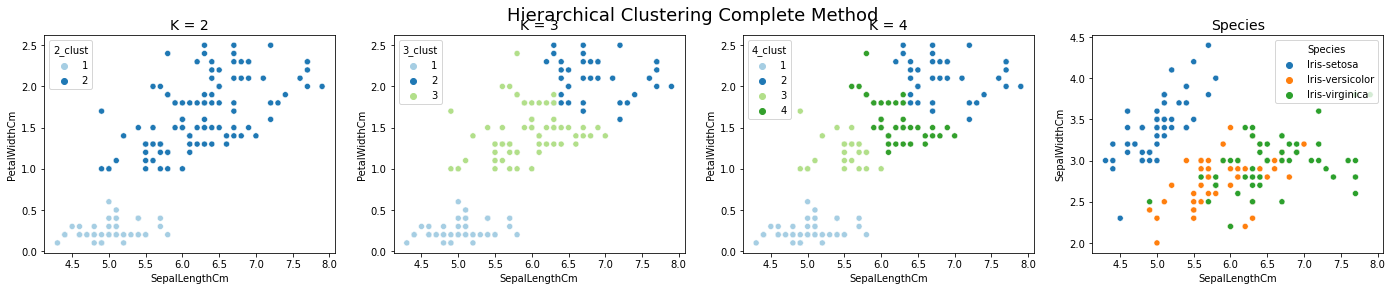

In [25]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Complete Method",fontsize=18)

plt.subplot(1,4,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="PetalWidthCm", data=iris_WM, hue="2_clust",palette="Paired")

plt.subplot(1,4,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="PetalWidthCm", data=iris_WM, hue="3_clust",palette="Paired")

plt.subplot(1,4,3)
plt.title("K = 4",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="PetalWidthCm", data=iris_WM, hue="4_clust",palette="Paired")

plt.subplot(1,4,4)
plt.title("Species",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_WM, hue="Species")

C:\Users\vaish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points

<AxesSubplot:title={'center':'K = 4'}, xlabel='Species', ylabel='4_clust'>

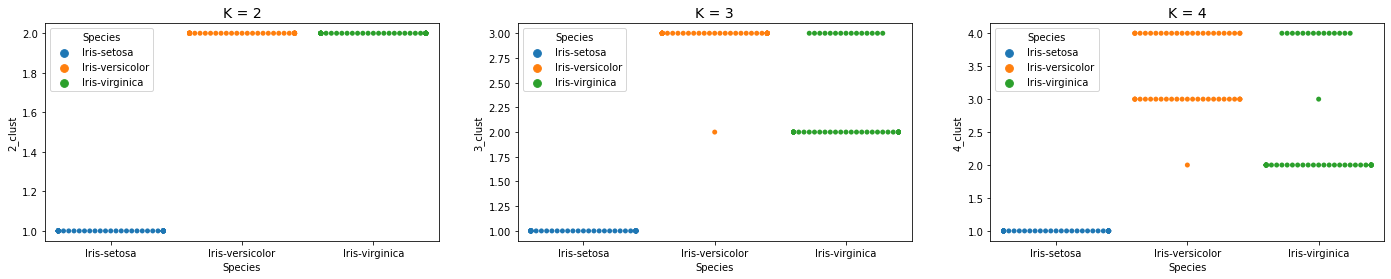

In [26]:
plt.figure(figsize=(24,4))
plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="Species",y="2_clust", data=iris_WM, hue="Species")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="Species",y="3_clust", data=iris_WM, hue="Species")

plt.subplot(1,3,3)
plt.title("K = 4",fontsize=14)
sns.swarmplot(x="Species",y="4_clust", data=iris_WM, hue="Species")


In [27]:
print(pd.crosstab(iris_CM["Species"],iris_WM["3_clust"]))
print('_____________________________________________')
print(pd.crosstab(iris_CM["Species"],iris_WM["4_clust"]))

3_clust           1   2   3
Species                    
Iris-setosa      50   0   0
Iris-versicolor   0   1  49
Iris-virginica    0  35  15
_____________________________________________
4_clust           1   2   3   4
Species                        
Iris-setosa      50   0   0   0
Iris-versicolor   0   1  25  24
Iris-virginica    0  35   1  14


Using the Ward algorithm with 3 clusters maintains the accuracy for the classification of Iris-Setosa and improves the accuracy of the classification of Iris-Versicolor. This method seems more accurate than the Complete method, in this case with three clusters there are 16 specimens outside of their species that is almost 90% of the specimens are properly classified by this algorithm and with the Complete method this ratio was around 81%.

It could by useful to add an aditional cluster that separates the data in four groups:

Definitely Iris-Setosa
Basically all Iris-Virginica
Basically all Iris-Versicolor
Too Close to Call: The physical measurments of the specimens in this cluster are to close and the algorithm does not identify the differences that the Taxonomist saw. Further analysis is needed to try to improve the classification

<AxesSubplot:title={'center':'K = 4'}, ylabel='4_clust'>

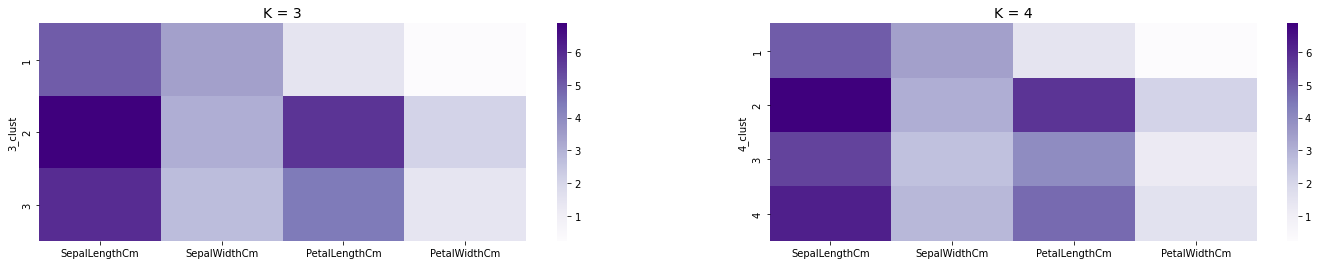

In [29]:
plt.figure(figsize=(24,4))

plt.subplot(1,2,1)
plt.title("K = 3",fontsize=14)
sns.heatmap(iris_WM.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","3_clust"]].groupby(['3_clust']).mean(), cmap="Purples")

plt.subplot(1,2,2)
plt.title("K = 4",fontsize=14)
sns.heatmap(iris_WM.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","4_clust"]].groupby(['4_clust']).mean(), cmap="Purples")

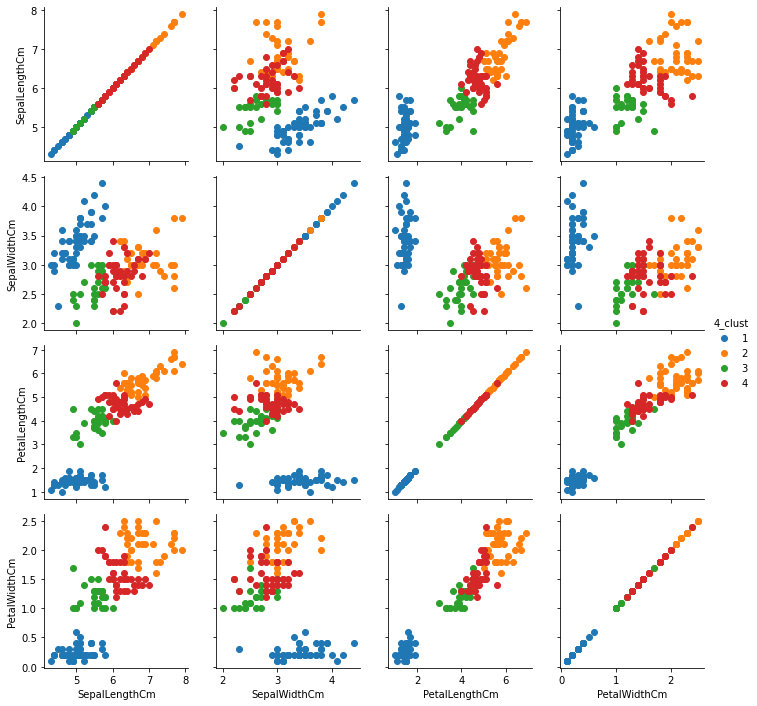

In [30]:
g = sns.PairGrid(iris_WM, vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], hue='4_clust')
g.map(plt.scatter)
g.add_legend()

Even when working on the same dataset, the results obtained from using different hierarchical clustering algorithms can vary a lot. Wich algorithm to use seems to depend on how evident is the grouping criteria between the variables.